# 🛠️ CALIDAD Y LIMPIEZA DE DATOS

---
## 📦 Importación de librerías
---

In [10]:
# 📦 Librerías base y configuración de entorno Jupyter
import numpy as np
import pandas as pd

import sys
from pathlib import Path

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from janitor import clean_names

# Estilo de visualización
pd.options.display.float_format = '{:.2f}'.format  # No usar notación científica
pd.set_option('display.max_columns', None)        # Mostrar todas las columnas
pd.set_option('display.max_colwidth', None)       # Mostrar todo el contenido de celdas

# Autocompletado avanzado
%config IPCompleter.greedy = True

# Estilo visual de encabezados en Jupyter
from IPython.display import display, HTML
display(HTML("""<style> th { text-align: center !important; font-weight: bold !important; } </style>"""))

---
## 📥 Carga de datos originales
---

In [4]:
# =============================================================
# 📁 Configuración inicial del entorno
# -------------------------------------------------------------
# ➤ Añade la ruta del proyecto al sys.path para importar desde 'src'.
# ➤ Importa funciones necesarias desde módulos internos.
# =============================================================

# Detectar raíz del proyecto desde notebooks, añadir src al path si aún no esta/
try:
    from utils import configurar_entorno
except ModuleNotFoundError:
    project_root = Path.cwd().resolve().parents[0]
    src_path = project_root / "src"
    if src_path.exists():
        sys.path.append(str(src_path))
    from utils import configurar_entorno

configurar_entorno()

# Importar funciones desde utils.py
from utils import load_data,  get_file_path, guardar_archivo

# Importar funciones desde data_cleaning.py

In [ ]:
# =============================================================
# 📦 Carga de datos de trabajo
# -------------------------------------------------------------
# ➤ Si existe el archivo .pkl, lo carga desde cache.
# ➤ Si no, lo carga desde el archivo CSV procesado.
# ➤ Muestra vista previa, estructura y análisis de valores únicos.
# =============================================================

ruta_trabajo_pkl = get_file_path("cache", "trabajo.pkl")
ruta_trabajo_csv = get_file_path("processed", "trabajo.csv")

if ruta_trabajo_pkl.exists():
    print("\n📦 Cargando desde Pickle...")
    df = load_data("cache", "trabajo.pkl")
else:
    print("\n📄 Cargando desde CSV procesado...")
    df = load_data("processed", "trabajo.csv")

# ✅ Vista previa del DataFrame
print("\n✅ Vista previa del DataFrame:")
display(df.head())
print('-' * 100)

# 📋 Información general del DataFrame
print("\n📋 Estructura del DataFrame:")
df.info()
print('\n' + '-' * 100)

# 🔍 Conteo de valores únicos por variable
print("\n🚨 Conteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))



📦 Cargando desde Pickle...

✅ Vista previa del DataFrame:


,id_cliente,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,137387967,Hvac technician,3 years,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,NaN,NaN,debt_consolidation,15000.00,7.21,36 months,464.60,2669.06,Current,0.00
1,4798121,"Target Promotions and Marketing,Inc",10+ years,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,NaN,NaN,NaN,debt_consolidation,10000.00,17.77,36 months,360.38,6362.96,Charged Off,0.00
2,46641215,Banker,5 years,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,NaN,NaN,NaN,debt_consolidation,24000.00,6.39,36 months,734.38,24000.00,Fully Paid,0.00
3,87998444,executive director,9 years,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,NaN,NaN,NaN,credit_card,27000.00,8.99,60 months,560.35,12443.00,Current,0.00
4,132883631,Subsea Technician,7 years,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,NaN,NaN,debt_consolidation,22000.00,10.90,36 months,719.22,22000.00,Fully Paid,0.00


----------------------------------------------------------------------------------------------------

📋 Estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id_cliente                   200000 non-null  int64  
 1   empleo                       185300 non-null  object 
 2   antigüedad_empleo            187112 non-null  object 
 3   ingresos                     200000 non-null  float64
 4   ingresos_verificados         200000 non-null  object 
 5   rating                       200000 non-null  object 
 6   dti                          199853 non-null  float64
 7   vivienda                     200000 non-null  object 
 8   num_hipotecas                195595 non-null  float64
 9   num_lineas_credito           199997 non-null  float64
 10  porc_tarjetas_75p            193368 non-null  

---
## ℹ️ Formateo y corrección de variables
---

In [6]:
# =============================================================
# 🧹 Corrección y estandarización de variables
# -------------------------------------------------------------
# 1. Aplica `clean_names()` para estandarizar los nombres de columnas.
# 2. Eliminar columnas irrelevantes o con un solo valor.
# 3. Modificar tipos de datos si es necesario.
# =============================================================

# 1️⃣ Corrección y estandarización de variables (snake_case, sin espacios, etc.)
# Corrección automática de nombres de variables
print(f"\n➢ Se realiza el formateo automático de los nombres de las variables para que sean más legibles y consistentes.\n")
df = clean_names(df)  

# Corrección manual de nombres de variables
# df.rename(columns={
#     'id': 'id_trabajo',
#     'fecha': 'fecha_trabajo',
#     'valor': 'valor_trabajo',
#     # Añadir más correcciones según sea necesario
# }, inplace=True)
print('-' * 100)


# 2️⃣ Eliminar variables irrelevantes o vacías
print("\n➢ Se eliminan las siguientes variables que no aportan valor al análisis:")
print("   - 'id_cliente': identificador único del cliente, no es necesario para el análisis cuantitativo.")
print("   - 'id_prestamo': esta variable tiene un solo valor en todos los registros, por lo tanto no aporta variabilidad ni información útil.")
print("   - 'descripcion': esta variable contiene descripciones textuales que no son necesarias para el análisis cuantitativo y son irrelevantes.\n")
print('-' * 100)

# Eliminar columnas especificadas
df.drop(columns=['id_cliente', 'id_prestamo', 'descripcion'], inplace=True)


# 3️⃣ Modificar tipos de datos si es necesario
print("\n➢ Se modifican los tipos de datos de las siguientes variables:")
print("   - 'antiguedad_empleo': convertida a tipo numérico para facilitar cálculos.")
print("   - 'num_cuotas': convertida a tipo numérico para facilitar cálculos.\n")
print('-' * 100)

# Convertir 'antiguedad_empleo' y 'num_cuotas' a tipo numérico. Extraer números de las cadenas y convertir a float
df['antiguedad_empleo'] = df['antiguedad_empleo'].str.extract(r'(\d+)').astype(float)
df['num_cuotas'] = df['num_cuotas'].str.extract(r'(\d+)').astype(float)


# 4️⃣ Visualización
print("\n📊 Vista previa del DataFrame tras limpieza básica:")
display(df)


➢ Se realiza el formateo automático de los nombres de las variables para que sean más legibles y consistentes.

----------------------------------------------------------------------------------------------------

➢ Se eliminan las siguientes variables que no aportan valor al análisis:
   - 'id_cliente': identificador único del cliente, no es necesario para el análisis cuantitativo.
   - 'id_prestamo': esta variable tiene un solo valor en todos los registros, por lo tanto no aporta variabilidad ni información útil.
   - 'descripcion': esta variable contiene descripciones textuales que no son necesarias para el análisis cuantitativo y son irrelevantes.

----------------------------------------------------------------------------------------------------

➢ Se modifican los tipos de datos de las siguientes variables:
   - 'antiguedad_empleo': convertida a tipo numérico para facilitar cálculos.
   - 'num_cuotas': convertida a tipo numérico para facilitar cálculos.

-----------------------

,empleo,antiguedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,Hvac technician,3.00,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,debt_consolidation,15000.00,7.21,36.00,464.60,2669.06,Current,0.00
1,"Target Promotions and Marketing,Inc",10.00,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,NaN,debt_consolidation,10000.00,17.77,36.00,360.38,6362.96,Charged Off,0.00
2,Banker,5.00,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,NaN,debt_consolidation,24000.00,6.39,36.00,734.38,24000.00,Fully Paid,0.00
3,executive director,9.00,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,NaN,credit_card,27000.00,8.99,60.00,560.35,12443.00,Current,0.00
4,Subsea Technician,7.00,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,debt_consolidation,22000.00,10.90,36.00,719.22,22000.00,Fully Paid,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Office Manager,10.00,42000.00,Not Verified,C,20.85,MORTGAGE,6.00,9.00,100.00,81.60,0.00,0.00,13.00,debt_consolidation,8000.00,12.29,36.00,266.83,8000.00,Fully Paid,0.00
199996,Owner & President,6.00,111697.00,Verified,B,16.63,MORTGAGE,2.00,10.00,50.00,26.30,0.00,1.00,6.00,other,10000.00,9.44,36.00,320.05,4388.51,Current,0.00
199997,Sr. Field Engineer,10.00,285000.00,Source Verified,D,6.02,MORTGAGE,3.00,9.00,25.00,21.10,0.00,0.00,25.00,small_business,30000.00,17.47,36.00,1076.62,5387.53,Current,0.00
199998,Attorney,8.00,168000.00,Source Verified,E,4.69,RENT,0.00,8.00,0.00,52.40,0.00,2.00,NaN,small_business,30050.00,18.25,60.00,767.17,2964.44,Charged Off,2750.88


---
## Duplicados
---

In [8]:
# ================================================================
# ELIMINACION DE REGISTROS DUPLICADOS
# -------------------------------------------------------------
# ➢ Elimina registros duplicados del DataFrame.
# ➢ Muestra el número de registros antes y después de la eliminación.
# ================================================================

# Eliminar duplicados
print(f"\n➢ Número de registros antes de eliminar duplicados: {df.shape[0]}")
print(f"➢ Registros duplicados: {df.duplicated().sum()}")
print(f"➢ Número de registros despues de eliminar duplicados: {df.shape[0]}")


➢ Número de registros antes de eliminar duplicados: 200000
➢ Registros duplicados: 0
➢ Número de registros despues de eliminar duplicados: 200000


---
## Separación de cariables categóricas y numéricas
---

In [9]:
# ================================================== #
# SEPARACIÓN DE VARIABLES CATEGÓRICAS Y NUMÉRICAS
# ================================================== #

# Variables categóricas: tipo object o category
cat = df.select_dtypes(include=['object', 'category']).copy()

# Variables numéricas: tipo number
num = df.select_dtypes(include='number').copy()

# Vista previa del DataFrame original
print("\n📄 Vista previa del DataFrame completo:")
display(df.head())  # Mostramos solo las primeras filas
print('-' * 100)

# Mostrar variables categóricas
print(f"\n🔠 Variables categóricas encontradas: {len(cat.columns)}")
display(cat.head())
print('-' * 100)

# Mostrar variables numéricas
print(f"\n🔢 Variables numéricas encontradas: {len(num.columns)}")
display(num.head())


📄 Vista previa del DataFrame completo:


,empleo,antiguedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,Hvac technician,3.00,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,debt_consolidation,15000.00,7.21,36.00,464.60,2669.06,Current,0.00
1,"Target Promotions and Marketing,Inc",10.00,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,NaN,debt_consolidation,10000.00,17.77,36.00,360.38,6362.96,Charged Off,0.00
2,Banker,5.00,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,NaN,debt_consolidation,24000.00,6.39,36.00,734.38,24000.00,Fully Paid,0.00
3,executive director,9.00,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,NaN,credit_card,27000.00,8.99,60.00,560.35,12443.00,Current,0.00
4,Subsea Technician,7.00,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,debt_consolidation,22000.00,10.90,36.00,719.22,22000.00,Fully Paid,0.00


----------------------------------------------------------------------------------------------------

🔠 Variables categóricas encontradas: 6


,empleo,ingresos_verificados,rating,vivienda,finalidad,estado
0,Hvac technician,Source Verified,A,MORTGAGE,debt_consolidation,Current
1,"Target Promotions and Marketing,Inc",Not Verified,D,RENT,debt_consolidation,Charged Off
2,Banker,Verified,A,RENT,debt_consolidation,Fully Paid
3,executive director,Source Verified,B,MORTGAGE,credit_card,Current
4,Subsea Technician,Source Verified,B,MORTGAGE,debt_consolidation,Fully Paid


----------------------------------------------------------------------------------------------------

🔢 Variables numéricas encontradas: 16


,antiguedad_empleo,ingresos,dti,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,imp_recuperado
0,3.00,54000.00,19.31,2.00,10.00,33.30,45.20,0.00,0.00,10.00,15000.00,7.21,36.00,464.60,2669.06,0.00
1,10.00,65000.00,25.40,1.00,15.00,85.70,86.20,0.00,0.00,NaN,10000.00,17.77,36.00,360.38,6362.96,0.00
2,5.00,135000.00,14.68,0.00,19.00,0.00,16.30,0.00,0.00,NaN,24000.00,6.39,36.00,734.38,24000.00,0.00
3,9.00,188000.00,11.69,3.00,15.00,0.00,3.30,0.00,0.00,NaN,27000.00,8.99,60.00,560.35,12443.00,0.00
4,7.00,125000.00,9.00,1.00,6.00,33.30,69.90,0.00,0.00,16.00,22000.00,10.90,36.00,719.22,22000.00,0.00


---
## Gestión de nulos
---


➢ Distribucion de registros segun cantidad de valores nulos que contiene cada uno con las variables finales.

 nº de nulos  registros
           0      88016
           1      92904
           2       9050
           3       9650
           4        301
           5         76
           7          2
           8          1


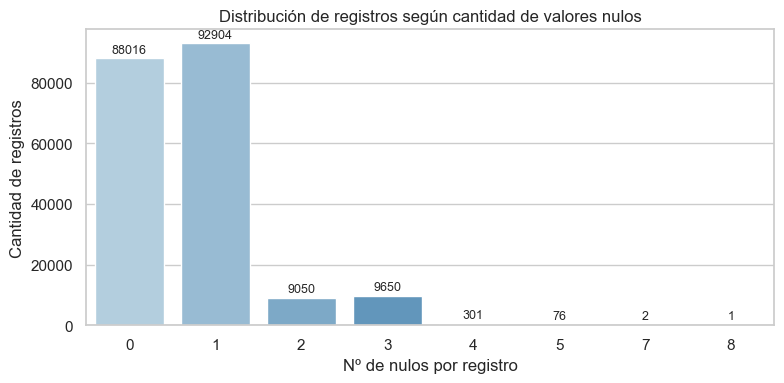

In [11]:
# ================================================== #
# TRATAMIENTO DE NULOS POR REGISTRO
# ================================================== #

# Distribucion de registros segun cantidad de valores nulos que contiene cada uno
# -------------------------------------------------- #
print("\n➢ Distribucion de registros segun cantidad de valores nulos que contiene cada uno con las variables finales.\n")
nulos_por_fila = df.isnull().sum(axis=1) # Cuenta cuántos valores nulos hay por fila
conteo_nulos = nulos_por_fila.value_counts().sort_index() # Agrupa y cuenta cuántas filas tienen 0, 1, 2, ... n nulos

df_nulos = pd.DataFrame({'nº de nulos': conteo_nulos.index, 'registros': conteo_nulos.values})
print(df_nulos.to_string(index=False))


# VISUALIZACIÓN: Gráfico de barras con Seaborn
# -------------------------------------------------- #

# Establecer estilo de gráfico
sns.set(style="whitegrid")

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_nulos, x='nº de nulos', y='registros', hue='nº de nulos', palette='Blues_d', legend=False)

# Configuración del gráfico
ax.set_title('Distribución de registros según cantidad de valores nulos')
ax.set_xlabel('Nº de nulos por registro')
ax.set_ylabel('Cantidad de registros')

# Añadir etiquetas sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout();

In [12]:
# ================================================== #
# IDENTIFICACIÓN DE VARIABLES
# ================================================== #

# Variables categóricas
cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Variables numéricas
num_vars = df.select_dtypes(include=['number']).columns.tolist()

# Mostrar resultados
print(f"Numero de registros: {df.shape[0]} \nNúmero de columnas: {df.shape[1]}")

print("\n📋 Variables categóricas:")
print(cat_vars)

print("\n📊 Variables numéricas:")
print(num_vars)

Numero de registros: 200000 
Número de columnas: 22

📋 Variables categóricas:
['empleo', 'ingresos_verificados', 'rating', 'vivienda', 'finalidad', 'estado']

📊 Variables numéricas:
['antiguedad_empleo', 'ingresos', 'dti', 'num_hipotecas', 'num_lineas_credito', 'porc_tarjetas_75p', 'porc_uso_revolving', 'num_cancelaciones_12meses', 'num_derogatorios', 'num_meses_desde_ult_retraso', 'principal', 'tipo_interes', 'num_cuotas', 'imp_cuota', 'imp_amortizado', 'imp_recuperado']


--------------------------------------------------------------------------------------------------
- dti = Ratio entre la deuda e ingresos // normalmente la cuota debe ser menor al 30% de los ingresos
--------------------------------------------------------------------------------------------------

In [13]:
# ================================================== #
# TRATAMIENTO DE NULOS — VARIABLES CATEGÓRICAS
# ================================================== #

# Conteo de nulos antes del tratamiento
cat_nulls_before = cat.isnull().sum()
cat_nulls_before = cat_nulls_before.sort_values(ascending=False)

print("\n📋 Nulos en variables categóricas (antes del tratamiento):")
print(cat_nulls_before)

# Aplicar tratamiento: rellenar con 'otros'
print("\n🧹 Tratamiento aplicado: reemplazo de nulos por 'otros'")
cat.fillna("otros", inplace=True)

# Verificación posterior
cat_nulls_after = cat.isnull().sum()
assert cat_nulls_after.sum() == 0, "⚠️ Aún hay nulos en variables categóricas."

print("\n✅ Nulos en variables categóricas (después del tratamiento):")
print(cat_nulls_after)


📋 Nulos en variables categóricas (antes del tratamiento):
empleo                  14700
ingresos_verificados        0
rating                      0
vivienda                    0
finalidad                   0
estado                      0
dtype: int64

🧹 Tratamiento aplicado: reemplazo de nulos por 'otros'

✅ Nulos en variables categóricas (después del tratamiento):
empleo                  0
ingresos_verificados    0
rating                  0
vivienda                0
finalidad               0
estado                  0
dtype: int64
